<a href="https://colab.research.google.com/github/nxxk23/bsc_dpdm22/blob/main/midterm_dpdm22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## การเตรียมข้อมูลประกอบด้วย กำจัด outlier, แก้ missing, normalization, one-hot-encoder และ อื่นๆ ที่นักศึกษาเห็นว่าเหมาะสม

# 1 ทำนายราคาบ้าน 10 คะแนน
เตรียมข้อมูลเพื่อทำนายราคาบ้าน ราคาประเมินบ้าน และ คะแนนทรัพย์ จาก [google drive](https://drive.google.com/drive/folders/1uIcUFY1yldIq-A3wijh2n2N6az-EljIe?usp=sharing) โดยข้อมูลที่เตรียมต้องประกอบด้วย columns ต่อไปนี้

* ```'renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price'``` จากตาราง "คำตอบนักประเมิน(ID)"

* ```จำนวน 7-11 และ โรงเรียน ในรัศมี 200,500,1000,2000 เมตร (ตั้งชื่อ d200-7/11','d500-7/11',...,'d2000-7/11' แบะ ;d200-school','d500-school',...,'d2000-school')``` จากตาราง "7-eleven.json" และ "school.json"

* ```ประเมินราคาซื้อขาย และ คะแนนทรัพย์ (ตั้งชื่อ 'estimator' และ 'score')``` จากตาราง คำตอบนักประเมิน(ID) โดยราคาประเมินกับคะแนนทรัพย์ อ้างอิงของนักประเมิน ID=01 คนเดียว

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#📋 Data House

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

#**Home1**

In [ ]:
import pandas as pd
gsht = gc.open_by_key('1RPoAJb0oRiVvXHvy3n8IP7ocEQeAVSwQ4wMROq1M5hw')
worksheet = gsht.worksheet("บ้านมือ1")
rows = worksheet.get_all_values()
home1 = pd.DataFrame.from_records(rows)
home1.columns=home1.iloc[0] 
home1 = home1.iloc[1:,]

In [ ]:
home1.columns

In [ ]:
h1 = home1[['id','latitude','longitude','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price']] # ไม่มี renovate

In [ ]:
h1_1 = h1.mask(h1 == '') ##replace blank values with NAN with DataFrame.mask()

In [ ]:
h1_1.isnull().any()

In [ ]:
h1_1.shape

###missing I
- number of rai
- number of ngan
- number of va


```
fill na with 0
```



In [ ]:
h1_1['number_of_rai'] = h1_1['number_of_rai'].replace(np.nan,0)

In [ ]:
h1_1['number_of_ngan'] = h1_1['number_of_ngan'].replace(np.nan,0)

In [ ]:
h1_1['number_of_va'] = h1_1['number_of_va'].replace(np.nan,0)

In [ ]:
h1_1.isnull().any()

### missing II
- number of story

```
fill na with ไม่ได้ระบุ + replace value
```


In [ ]:
h1_1['number_of_story'] = h1_1['number_of_story'].replace(np.nan,'ไม่ได้ระบุ')

In [ ]:
h1_1['number_of_story'] = h1_1['number_of_story'].replace(0,'ไม่มีสิ่งปลูกสร้าง / มีสิ่งปลูกสร้าง 1 ชั้น')

In [ ]:
h1_1['number_of_story'] = h1_1['number_of_story'].replace(1,'มีสิ่งปลูกสร้าง 1 ชั้น')

In [ ]:
h1_1['number_of_story'] = h1_1['number_of_story'].replace(2,'มีสิ่งปลูกสร้าง 2 ชั้น')

In [ ]:
h1_1.isnull().any()

###missing III
- number of bedroom จำนวนห้องนอน 
- number of bathroom จำนวนห้องน้ำ
+ number of parking จำนวนที่จอดรถ
+ sell_price ราคาขาย
+ area usable พื้นที่ใช้สอย




```
ควรเติมค่าว่างด้วย ไม่ระบุ เพราะบางบ้านอาจมี 0 ห้องนอน เลยไม่เติม 0 เพราะอาจ misslead 
```


In [ ]:
h1_1['number_of_bedroom'] = h1_1['number_of_bedroom'].replace(np.nan,'ไม่ได้ระบุ')

In [ ]:
h1_1['number_of_bathroom'] = h1_1['number_of_bathroom'].replace(np.nan,'ไม่ได้ระบุ')

In [ ]:
h1_1['number_of_parking'] = h1_1['number_of_parking'].replace(np.nan,'ไม่ได้ระบุ')

In [ ]:
h1_1['sell_price'] = h1_1['sell_price'].replace(np.nan,'ไม่ได้ระบุ')

In [ ]:
h1_1['usable_area'] = h1_1['usable_area'].replace(np.nan,'ไม่ได้ระบุ')

###missing IIII
- direction
- furniture



```
เติมค่าว่างด้วย  0
```

In [ ]:
h1_1['furniture'] = h1_1['furniture'].replace(np.nan, 0)

In [ ]:
h1_1['direction'] = h1_1['direction'].replace(np.nan, 0)

In [ ]:
h1_1.isnull().any()

### missing IIIII
- lat,lng

In [ ]:
h1_1['longitude'] = h1_1['longitude'].replace(np.nan,'ไม่ได้ระบุ')

In [ ]:
h1_1['latitude'] = h1_1['latitude'].replace(np.nan,'ไม่ได้ระบุ')

In [ ]:
home1 = h1_1[['id','latitude','longitude','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price']]

In [ ]:
h1_1.isnull().any()

#**Home2**

In [ ]:
gsht = gc.open_by_key('1QO6OiGqyr8i78MVnjyLBBtr5Y8AoBM1tHZRg0Ud5CW4')
worksheet = gsht.worksheet("บ้านมือ2")
rows = worksheet.get_all_values()
home2 = pd.DataFrame.from_records(rows)
home2.columns=home2.iloc[0] 
home2 = home2.iloc[1:,]

In [ ]:
h2 = home2[['id','name_th','latitude','longitude','renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price']]

In [ ]:
h2.info()

In [ ]:
h2_2 = h2.mask(h2 == '') ##replace blank values with NAN with DataFrame.mask()

In [ ]:
h2_2.isnull().any()

In [ ]:
h2_2.shape


### missing I
- renovate ค่าว่างคือที่ดินเปล่า จึงไม่มีการ renovate ได้ ถ้าอันที่มีค่า มักเป็นบ้านหรือ ที่ดินพร้อมสิ่งปลูกสร้างที่ตอบได้ว่าเคยหรือไม่เคย renovate


```
แต่จากที่ดู พบว่า มีคละๆกันไป แม้จะเป็นที่ดิน ก็มีการตอบ no หรือ yes ได้ ดังนั้น เลือกเติม renovate ด้วยค่า *ไม่ได้ระบุ*
```

- ครบ 1656 แถวจ้า



In [ ]:
#h2[h2['name_th'].str.startswith('ขายที่ดินพร้อมสิ่งปลูกสร้าง')].eq('').any() #138 renovate is not null

In [ ]:
#h2[h2['name_th'].str.startswith('ขายที่ดินพร้อมสิ่งปลูกสร้าง')]['number_of_story'].replace('',1)

In [ ]:
#h2[h2['name_th'].str.startswith('ขายที่ดินเปล่า')].eq('').any() #1 renovate is not null

In [ ]:
#h2[h2['name_th'].str.startswith('ขายบ้าน')].eq('').any() #814 มีค่าว่าง

In [ ]:
#h2[h2['name_th'].str.startswith('บ้าน')].eq('').any() #323 มีค่าว่าง

In [ ]:
#h2[h2['name_th'].str.startswith('ที่ดิน')].eq('').any() #47 มีค่าว่าง

In [ ]:
#h2[h2['name_th'].str.startswith('ที่ดินเปล่า')].eq('').any() #4 มีค่าว่าง

In [ ]:
#h2[h2['name_th'].str.startswith('ที่ดินพร้อมสิ่งปลูกสร้าง')].eq('').any() # มี 43 rows renovate is not null

In [ ]:
#h2[h2['name_th'].str.startswith('📌')].eq('').any() # 11 renovate is not null

In [ ]:
#h2[h2['name_th'].str.startswith('ขาย')].eq('').any() #1173

**Replace** 'null' with not specifieed

In [ ]:
import numpy as np

In [ ]:
h2_2['renovate'] = h2_2['renovate'].replace(np.nan,'ไม่ได้ระบุ')

In [ ]:
h2_2.isnull().any()

In [ ]:
#h2[h2['renovate']=='not specified'].count() #211

In [ ]:
#h2[h2['renovate']=='no'].count() #1393

In [ ]:
#h2[h2['renovate']=='yes'].count() #24

In [ ]:
#h2[h2['renovate']=='ไม่ระบุ'].count() #28

###missing II
- number of story น่าจะเป็นจำนวนชั้นของสิ่งปลูกสร้าง 
- ซึ่งมีกรณีชื่อ ที่ดินเปล่า แต่เติมเลข 0, 1, 2 
- หรือกรณีชื่อ บ้าน แต่เติมเลข 0, 1, 2 เช่นกัน 
-- แปลว่า อาจจะต้องทำ dummy variable 


```
0 : ไม่มีสิ่งปลูกสร้าง / มีสิ่งปลูกสร้าง 1 ชั้น แต่ไม่เข้าใจ metadata คิดว่า บ้านไม่มีชั้น
1 : มีสิ่งปลูกสร้าง 1 ชั้น
2 : มีสิ่งปลูกสร้าง 2 ชั้น 
ไม่ระบุ
```



```
เติม ไม่ระบุ : ช่องว่าง ไม่เติม 0 เพราะอาจ misslead 
```



In [ ]:
#h2[h2['name_th'].str.startswith('ที่ดินเปล่า')].eq('').any() #มีค่าว่าง

In [ ]:
#h2[h2['name_th'].str.startswith('บ้าน')].eq('').any()  #มีค่าว่าง

**Replace null with not specifieed**

In [ ]:
h2_2['number_of_story'] = h2_2['number_of_story'].replace(np.nan,'ไม่ได้ระบุ')

**Replace 0 with ไม่มีสิ่งปลูกสร้าง / มีสิ่งปลูกสร้าง 1 ชั้น**

In [ ]:
h2_2['number_of_story'] = h2_2['number_of_story'].replace(0,'ไม่มีสิ่งปลูกสร้าง / มีสิ่งปลูกสร้าง 1 ชั้น')

**Replace 1 with มีสิ่งปลูกสร้าง 1 ชั้น**

In [ ]:
h2_2['number_of_story'] = h2_2['number_of_story'].replace(1,'มีสิ่งปลูกสร้าง 1 ชั้น')

**Replace 2 with มีสิ่งปลูกสร้าง 2 ชั้น**

In [ ]:
h2_2['number_of_story'] = h2_2['number_of_story'].replace(2,'มีสิ่งปลูกสร้าง 2 ชั้น')

In [ ]:
h2_2.isnull().any()

### missing III
- number of bedroom จำนวนห้องนอน 
+ number of parking จำนวนที่จอดรถ
+ sell_price ราคาขาย
+ area usable พื้นที่ใช้สอย



```
ควรเติมค่าว่างด้วย ไม่ระบุ เพราะบางบ้านอาจมี 0 ห้องนอน เลยไม่เติม 0 เพราะอาจ misslead 
```



In [ ]:
h2_2['number_of_bedroom'] = h2_2['number_of_bedroom'].replace(np.nan,'ไม่ได้ระบุ')

In [ ]:
h2_2['number_of_parking'] = h2_2['number_of_parking'].replace(np.nan,'ไม่ได้ระบุ')

In [ ]:
h2_2['sell_price'] = h2_2['sell_price'].replace(np.nan,'ไม่ได้ระบุ')

In [ ]:
h2_2['usable_area'] = h2_2['usable_area'].replace(np.nan,'ไม่ได้ระบุ')

In [ ]:
h2_2.isnull().any()

### missing IIII
- lat,lng

In [ ]:
h2_2['latitude'] = h2_2['latitude'].replace(np.nan,'ไม่ได้ระบุ')

In [ ]:
h2_2['longitude'] = h2_2['longitude'].replace(np.nan,'ไม่ได้ระบุ')

In [ ]:
h2_2.isnull().any()

In [ ]:
home2 = h2_2[['id','latitude','longitude','renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price']]

##Insert Column


In [ ]:
home1['renovate'] = 'ไม่ได้ระบุ'

In [ ]:
home1['second_hand']='บ้านมือ1'

In [ ]:
home2['second_hand']='บ้านมือ2'

In [ ]:
home1.shape

In [ ]:
home2.shape

#📌 Result : House 
2410 rows × 14 columns

In [ ]:
house = pd.concat([home2, home1])
house

In [ ]:
house.isnull().any()

#📋Data Assessor 

In [ ]:
gsht = gc.open_by_key('1A3A-Yl4Tmcq2kPWf37QG6xdRZZ-4XDWULRPfORGPrNQ')
worksheet = gsht.worksheet("บ้าน")
rows = worksheet.get_all_values()
ass = pd.DataFrame.from_records(rows)
ass.columns=ass.iloc[0] 
ass = ass.iloc[1:,]
ass.head()

In [ ]:
ass1 = ass[ass['ID ผู้ประเมิน']=='1']
ass1.info()

In [ ]:
a1 = ass1[['ID','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์']]

In [ ]:
#a1.rename(columns={'ประเมินราคาซื้อ-ขาย':'estimator', 'ให้คะแนนทรัพย์':'score'})

In [ ]:
a1.eq('').any() #มันมีค่าว่างแต่เพราะเป็น object เลยเป็นงี้

###**Replace space with nan**

In [ ]:
a1_1 = a1.mask(a1 == '') 

In [ ]:
a1_1.isnull().any()

### missing
- ประเมินราคาทรัพย์
- ให้คะแนนทรัพย์

```
เติม ไม่ได้ประเมินราคาทรัพย์ และไม่ได้ให้คะแนน
```

In [ ]:
a1_1['ประเมินราคาซื้อ-ขาย'] = a1_1['ประเมินราคาซื้อ-ขาย'].replace(np.nan,'ไม่ได้ประเมินราคา')

In [ ]:
a1_1['ให้คะแนนทรัพย์'] = a1_1['ให้คะแนนทรัพย์'].replace(np.nan,'ไม่ได้ให้คะแนน')

In [ ]:
ass = a1_1.rename(columns={'ประเมินราคาซื้อ-ขาย':'estimator', 'ให้คะแนนทรัพย์':'score'})

In [ ]:
ass.isnull().any()

###One-Hot-Encoder

In [ ]:
ass_data_dummies = pd.get_dummies(ass,columns=['score']) 

#📌 Result : Assessor 
1217 rows × 7 columns

In [ ]:
ass_data_dummies

In [ ]:
ass_data_dummies.isnull().any()

#📋Data 7/11 vs home vs school

In [ ]:
import pandas as pd
import json
with open('/content/drive/MyDrive/DPDM/Midterm/MIDterm/7-eleven.json') as json_file:
    sv = json.loads(json_file.read())

In [ ]:
with open('/content/drive/MyDrive/DPDM/Midterm/MIDterm/school.json') as json_file:
    sc = json.loads(json_file.read())

###table Merge : house + ass

In [ ]:
ha = house.merge(ass_data_dummies, left_on='id', right_on='ID')

In [ ]:
ha

In [ ]:
seven_id = {}
for t in sv:
    l = list()
    for x in sv[t]:
        l.append(x['geometry']['location'])
    #print(t)
    #print(l)
    seven_id[t]=l

In [ ]:
school_id = {}
for t in sc:
    l = list()
    for x in sc[t]:
        l.append(x['geometry']['location'])
    #print(t)
    #print(l)
    school_id[t]=l

##**Test**

In [ ]:
id = '16'

In [ ]:
this_home = ha[ha['id']==id]

In [ ]:
h_lat = this_home['latitude'].values
h_lng = this_home['longitude'].values

In [ ]:
this_seven = seven_id[str(id)]
this_seven

In [ ]:
import geopy.distance

In [ ]:
seven_dist=list()
loc1 = [h_lat,h_lng]
for seven in this_seven:
    loc2 = [seven['lat'],seven['lng']]
    dist = geopy.distance.geodesic(loc1,loc2).m
    seven_dist.append(dist)

seven_dist

In [ ]:
def cal_seven_radius(seven_dist_list,radius):
    num = 0
    for seven in seven_dist_list:
        if seven < radius:
            num = num + 1
    return num

In [ ]:
record_list = list()

In [ ]:
record_dict = {}
record_dict['id'] = id 
record_dict['d200-7/11'] = sum(np.array(seven_dist) < 200)
record_dict['d500-7/11'] = sum(np.array(seven_dist) < 500)
record_dict['d1000-7/11'] = sum(np.array(seven_dist) < 1000)
record_dict['d2000-7/11'] = sum(np.array(seven_dist) < 2000)

In [ ]:
record_dict

In [ ]:
record_list.append(record_dict)

##คำนวณจริง

In [ ]:
record_list = list()
for id in ha['id']:
    print(id)
    this_home = ha[ha['id']== id]
    h_lat=this_home['latitude'].values[0]
    h_long=this_home['longitude'].values[0]
    this_seven = seven_id[str(int(id))] #7/11 ไม่มี key 3295 
    seven_dist=list()
    loc1 = [h_lat,h_long]
    for seven in this_seven:
        loc2 = [seven['lat'],seven['lng']]
        dist = geopy.distance.geodesic(loc1,loc2).m
        seven_dist.append(dist)

    record_dict = {}
    record_dict['id'] = id 
    record_dict['d200-7/11'] = sum(np.array(seven_dist) < 200)
    record_dict['d500-7/11'] = sum(np.array(seven_dist) < 500)
    record_dict['d1000-7/11'] = sum(np.array(seven_dist) < 1000)
    record_dict['d2000-7/11'] = sum(np.array(seven_dist) < 2000)
    record_list.append(record_dict)

final_table = pd.DataFrame(record_list)

# 2 ทำนายสภาพอากาศ 10 คะแนน
เตรียมข้อมูลเพื่อทำนายสภาพอากาศของวันถัดไป โดย 
- กลุ่มที่ 1 และ 9 ทำนาย อุณหภูมิตุ้มแห้ง (Y)
- กลุ่มที่ 2 ทำนาย อุณหภูมิต่ำสุด (Y)
- กลุ่มที่ 3 ทำนาย อุณหภูมิจุดน้ำค้าง (Y)
- กลุ่มที่ 4 ทำนาย จำนวนเมฆ (Y)
- กลุ่มที่ 5 ทำนาย ปริมาณฝน (Y)
- กลุ่มที่ 6 ทำนาย ความชื้นสัมพัทธ์ (Y)
- กลุ่มที่ 7 ทำนาย ความกด (Y)
- กลุ่มที่ 8 ทำนาย ความเร็วลม (Y)

ลักษณะของ data เป็นดังนี้ Xi คือ features อื่นๆที่ใช้ในทำนาย และ Y คือค่าที่ต้องการทำนาย

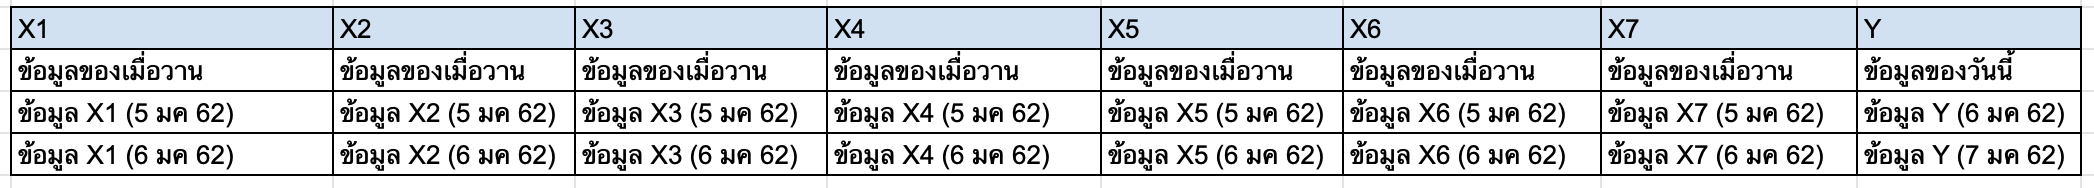



#**Weather**

In [ ]:
import pandas as pd
weather = pd.read_csv('/content/drive/MyDrive/DPDM/Midterm/Group7_17ธนภรณ์_19นารากร_20สุริยา_35อรัญญา.csv')

In [ ]:
features = weather[['อุณหภูมิตุ้มแห้ง','อุณหภูมิต่ำสุด','อุณหภูมิจุดน้ำค้าง','จำนวนเมฆ','ปริมาณฝน','ความชื้นสัมพัทธ์','ความเร็วลม','ความกด']]
features

# 📌 missing


```
    มีค่า - และ T เลือกดรอป แล้วเอาแค่ค่าที่มีข้อมูลครบ
```



In [ ]:
features = features.replace(regex=r'^ba.$', value='')

In [ ]:
features.eq('').any() #ไม่มี

In [ ]:
features.eq('-').any()

In [ ]:
features.eq('T').any()

In [ ]:
features[features.eq('-').any(1)==True]

In [ ]:
features[features.eq('T').any(1)==True]

In [ ]:
data_features_d = features[features.eq('-').any(1)==False]
data_features_d.shape

In [ ]:
data_features_d = data_features_d[data_features_d.eq('T').any(1)==False]
data_features_d.shape

In [ ]:
data_features_d['ความเร็วลม'] = data_features_d['ความเร็วลม'].astype(float)
data_features_d['จำนวนเมฆ'] = data_features_d['จำนวนเมฆ'].astype(float)
data_features_d['ปริมาณฝน'] = data_features_d['ปริมาณฝน'].astype(float)
data_features_d['อุณหภูมิต่ำสุด'] = data_features_d['อุณหภูมิต่ำสุด'].astype(float)

In [ ]:
data_features_d.isnull().any()

# Result : Weather

In [ ]:
data_features_d

# **Predict**

In [ ]:
X = data_features_d[['อุณหภูมิตุ้มแห้ง','อุณหภูมิต่ำสุด','อุณหภูมิจุดน้ำค้าง','จำนวนเมฆ','ปริมาณฝน','ความชื้นสัมพัทธ์','ความเร็วลม']]
Y = data_features_d[['ความกด']]

In [ ]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm


x = data_features_d[['อุณหภูมิตุ้มแห้ง','อุณหภูมิต่ำสุด','อุณหภูมิจุดน้ำค้าง','จำนวนเมฆ','ปริมาณฝน','ความชื้นสัมพัทธ์','ความเร็วลม']]
y = data_features_d[['ความกด']]


# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

In [ ]:
from sklearn.linear_model import LinearRegression

x = data_features_d[['อุณหภูมิตุ้มแห้ง','อุณหภูมิต่ำสุด','อุณหภูมิจุดน้ำค้าง','จำนวนเมฆ','ปริมาณฝน','ความชื้นสัมพัทธ์','ความเร็วลม']]
y = data_features_d[['ความกด']]

#Define the multiple linear regression model
linear_regression = LinearRegression()

#Fit the multiple linear regression model
linear_regression.fit(x,y)

#predict with the data
y_pred = linear_regression.predict(x)

y_pred

In [ ]:
pred_y = pd.DataFrame(y_pred)

In [ ]:
df1 = x.rename(columns={'อุณหภูมิตุ้มแห้ง':'X1','อุณหภูมิต่ำสุด':'X2','อุณหภูมิจุดน้ำค้าง':'X3','จำนวนเมฆ':'X4','ปริมาณฝน':'X5','ความชื้นสัมพัทธ์':'X6','ความเร็วลม':'X7'})

In [ ]:
df2 = pred_y.rename(columns={0:'Y'})

**Merge**

In [ ]:
df1['อะไรก็ได้'] = range(0,5061)
df2['อะไรวะ'] = range(0,5061)

In [ ]:
result = df1.merge(df2, left_on = 'อะไรก็ได้', right_on ='อะไรวะ')
results = result[['X1','X2','X3','X4','X5','X6','X7','Y']]
results